In [1]:
import trait2d as tr
#import trait2d_minflux.minflux as mf
from trait2d.analysis.minflux import importPKL, openPKL
import pandas as pd
import trait2d.analysis.minflux as mf


###Ignore a warning which is only relevant for legacy files
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

#display option for my mental health
pd.set_option('display.precision',12)

### The importPKL function works well with the old format, but not with the new, so it needs to be worked around a bit

In [2]:
old = importPKL(name = 'oldformat.pkl')

In [3]:
new = importPKL(name = 'newformat.pkl')

In [4]:
from trait2d.analysis.minflux import MFTrack

for i in range(len(old)):
    xx = mf.MFTrack.from_importPKL(old[i])

In [5]:
from trait2d.analysis.minflux import MFTrackDB

masso = MFTrackDB.from_pkl('.','newformat.pkl')

In [6]:
type(masso._tracks[1])

trait2d.analysis.minflux.MFTrack

In [15]:
import numpy as np

from trait2d.analysis import ModelDB
from trait2d.analysis.models import ModelBrownian, ModelConfined, ModelHop

if len(ModelDB().models) !=0:
    ModelDB().cleanup()


ModelDB().add_model(ModelBrownian)
ModelDB().add_model(ModelConfined)
ModelDB().add_model(ModelHop)

In [16]:
masso.adc_analysis();

In [17]:
for track in masso._tracks:
    print(track._adc_analysis_results['best_model'])

ModelHop
ModelHop
None
ModelHop
ModelBrownian
ModelHop
ModelHop
ModelHop
ModelHop
ModelHop
ModelHop
ModelHop
ModelBrownian
ModelHop
ModelHop
ModelHop
ModelHop


In [19]:
import trait2d.analysis.minflux as mf

tf = masso.adc_analysis(max_index = 500, fraction_fit_points = 0.1,maxfev = 5000)

tf2 = masso.MF_model_average(max_index = 500, fraction_fit_points = 0.1,maxfev = 5000)

In [20]:
tf2['sectors']

[('ModelBrownian', 2), ('ModelHop', 14)]

In [26]:
import trait2d.analysis.minflux as mf

masso.MF_adc_summary();

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap


fig, ax = plt.subplots(figsize = (7,7),frameon=False)
points = np.array([aaa._x,aaa._y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
norm = plt.Normalize(aaa._t.min(),aaa._t.max(),100)
lc = LineCollection(segments, cmap='plasma',norm = norm)
line = ax.add_collection(lc)
lc.set_array(aaa._t)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.axis('off')

from mpl_toolkits.axes_grid1 import make_axes_locatable

divider = make_axes_locatable(ax)
cbar = fig.colorbar(line, cax=fig.add_axes([0.659, 0.22, 0.155, 0.01]), orientation = 'horizontal')
cbar.set_ticks([cbar.vmin + t*(cbar.vmax-cbar.vmin) for t in cbar.ax.get_yticks()])
cbar.set_ticklabels([t for t in cbar.ax.get_yticks()])

ax.set_xlim((aaa._x.min(),aaa._x.max()))
ax.set_ylim((aaa._y.min(),aaa._y.max()))
scalebar = mpatches.Rectangle((-1.7E-6,4.35E-6),0.1E-6,0.01E-6,facecolor='black')

ax.add_patch(scalebar)
ax.set_aspect(1.0)

In [42]:
from scipy.odr import RealData, Model, ODR


In [38]:
ex = masso._tracks[1]

In [80]:
datei = RealData(ex._tn[0:20], y = ex._adc[0:20], sx = ex._tn_error[0:20], sy = ex._adc_error[0:20])

In [91]:
R = 0.166666666

def brownie(B,t):
    return B[0] + B[1]**2 / (2*t*(1-2*R*t[0]/t))

In [92]:
mod = Model(brownie)

In [93]:
gionni = ODR(datei,mod,beta0 = [0.5E-12, 20E-9])

In [94]:
gionni.run()

In [95]:
gionni.output.beta

array([9.01594112e-14, 2.14629868e-08])

In [96]:
yy = brownie(gionni.output.beta,ex._tn[0:20])

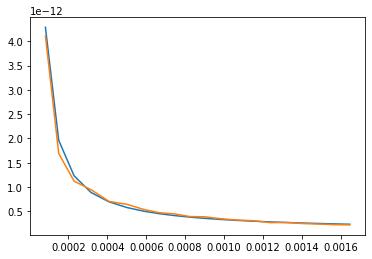

In [97]:
import matplotlib.pyplot as plt

plt.plot(ex._tn[0:20],yy)
plt.plot(ex._tn[0:20],ex._adc[0:20])

In [125]:
class _Brownian(Model):
    def brony(self,B,t):
        return B[0] + B[1]**2 / (2*t*(1-2*self.R*t[0]/t))
    
    def __init__(self, R):
        self.R = R
        super().__init__(brony, fjacb=None, fjacd=None,
        extra_args=None, estimate=None, implicit=False, meta=None)
        

        
        
bronian = _Brownian(R = 0.16666666)

NameError: name 'brony' is not defined

In [119]:
gionni5 = ODR(datei,bronian,beta0 = [0.5E-12, 20E-9])

gionni5.run()

In [120]:
yyy = bronian.fcn(gionni5.output.beta,ex._tn[0:20])

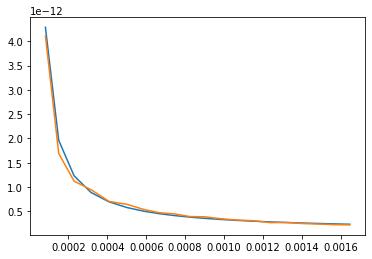

In [121]:
plt.plot(ex._tn[0:20],yyy)
plt.plot(ex._tn[0:20],ex._adc[0:20])

In [28]:
from trait2d.analysis import ModelDB
from trait2d.analysis.models import ModelBrownian, ModelHop
ModelDB().cleanup()
ModelDB().add_model(ModelHop)
ModelDB().add_model(ModelBrownian)

In [29]:
aaa.MF_adc_analysis(weighting = 'error')

NameError: name 'aaa' is not defined

In [30]:
import matplotlib.pyplot as plt

idxs = aaa._adc_analysis_results['fit_indices']
hop_params = aaa._adc_analysis_results['fit_results']['ModelHop']['params']

fig, ax = plt.subplots(figsize = (16,9))
ax.scatter(aaa._tn[idxs],aaa._adc[idxs],s = 30)
ax.semilogx(aaa._tn[idxs],ModelDB().models[0](aaa._tn[idxs],*hop_params),c = 'red')

NameError: name 'aaa' is not defined